## Interpretability of models with SHAP

In [3]:
import tqdm
tqdm.tqdm = tqdm.autonotebook.tqdm

import shap

In [5]:
print(f"{shap.__version__}")

0.42.1


In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('FIFA 2018 Statistics.csv')

In [9]:
data.head(n=7).style.background_gradient(cmap='Blues')

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,Yes,12.000000,Group Stage,No,0,nan,nan
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,No,nan,Group Stage,No,0,nan,nan
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,No,nan,Group Stage,No,0,nan,nan
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,Yes,89.000000,Group Stage,No,0,nan,nan
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,No,nan,Group Stage,No,0,1.000000,90.000000
5,15-06-2018,Iran,Morocco,1,36,8,2,5,1,2,0,22,2,86,194,100,14,3,0,0,Yes,90.000000,Group Stage,No,0,nan,nan
6,15-06-2018,Portugal,Spain,3,39,8,3,2,3,4,1,13,2,87,366,102,12,1,0,0,No,4.000000,Group Stage,No,0,nan,nan


In [10]:
data.columns.tolist()

['Date',
 'Team',
 'Opponent',
 'Goal Scored',
 'Ball Possession %',
 'Attempts',
 'On-Target',
 'Off-Target',
 'Blocked',
 'Corners',
 'Offsides',
 'Free Kicks',
 'Saves',
 'Pass Accuracy %',
 'Passes',
 'Distance Covered (Kms)',
 'Fouls Committed',
 'Yellow Card',
 'Yellow & Red',
 'Red',
 'Man of the Match',
 '1st Goal',
 'Round',
 'PSO',
 'Goals in PSO',
 'Own goals',
 'Own goal Time']

In [11]:
y = (data['Man of the Match'] == "Yes")  # Convert from string "Yes"/"No" to binary
feature_names = [i for i in data.columns if data[i].dtype in [np.int64, np.int64]]

X = data[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

my_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


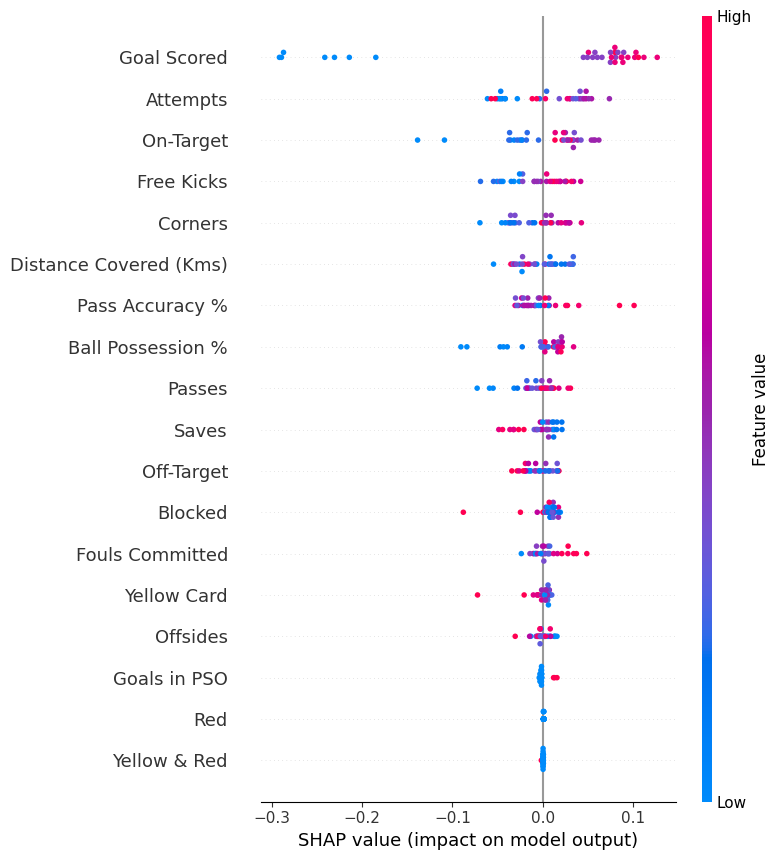

In [12]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(val_X)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], val_X)

In [13]:
row_to_show = 5
data_for_prediction = val_X.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)


my_model.predict_proba(data_for_prediction_array)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


array([[0.29, 0.71]])

In [14]:
# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction_array)

In [15]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction_array)